In [26]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
file_path = 'FullText_ALL.csv'
FullText_df = pd.read_csv(file_path)
FullText_df.head()

,Unnamed: 0,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text
0,0,10 Automated Face Analysis for Affective Compu...,"['JF Cohn', 'F De la Torre']",2015,170,Affective Faces Database,classifier,Differences in manual coding between databases...,The Oxford handbook of affective …,https://academic.oup.com/edited-volume/28057/c...,NaN
1,1,3D facial expression recognition based on auto...,"['H Tang', 'TS Huang']",2008,205,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",facial expression recognition from 3D facial s...,… on computer vision and pattern recognition …,https://ieeexplore.ieee.org/document/4563052,3D Facial Expression Recognition Based on Auto...
2,2,3D facial expression recognition based on prim...,"['J Wang', 'L Yin', 'X Wei', 'Y Sun']",2006,440,Binghamton University 3D Facial Expression,facial expression recognition,expressions using 3D facial expression range d...,… Vision and Pattern Recognition …,https://ieeexplore.ieee.org/document/1640921,3D Facial Expression Recognition Based on Prim...
3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...
4,4,3D facial expression recognition using SIFT de...,"['S Berretti', 'B Ben Amor', 'M Daoudi', 'A De...",2011,184,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",at the Binghamton University (BU-3DFE database...,The Visual Computer,https://www.researchgate.net/publication/22006...,NaN


In [32]:
# Sample dataframe containing the text data
# Replace this with the actual dataframe column as per your case
df = FullText_df.copy()

def clean_text(text):
    # Return NaN if text is empty or placeholder
    if text is np.nan or text == "Nothing found":
        return np.nan

    # Remove common metadata patterns and unwanted sections
    # Adjust regex patterns based on your files' content
    text = re.sub(r'\b(References|Cited by|Acknowledgments|Table of Contents|Outline|Figure \d+|Table \d+|DOI: .*)', '', text, flags=re.IGNORECASE)
    text = re.sub(r'##?\s?Title:.*?\n', '', text)  # Remove lines that start with '## Title:'
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs

    # Remove special characters and multiple spaces
    text = re.sub(r'\n+', ' ', text)  # Replace newlines with space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\s*Figure\s*\d+\s*', '', text)  # Remove figure references
    text = re.sub(r'\s*Table\s*\d+\s*', '', text)  # Remove table references

    # Trim any leading or trailing whitespace
    text = text.strip()

    return text

# Apply the cleaning function to the Full_Text column
df['Full_Text'] = df['Full_Text'].apply(clean_text)

# Display the cleaned texts
df.head()


,Unnamed: 0,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text
0,0,10 Automated Face Analysis for Affective Compu...,"['JF Cohn', 'F De la Torre']",2015,170,Affective Faces Database,classifier,Differences in manual coding between databases...,The Oxford handbook of affective …,https://academic.oup.com/edited-volume/28057/c...,NaN
1,1,3D facial expression recognition based on auto...,"['H Tang', 'TS Huang']",2008,205,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",facial expression recognition from 3D facial s...,… on computer vision and pattern recognition …,https://ieeexplore.ieee.org/document/4563052,3D Facial Expression Recognition Based on Auto...
2,2,3D facial expression recognition based on prim...,"['J Wang', 'L Yin', 'X Wei', 'Y Sun']",2006,440,Binghamton University 3D Facial Expression,facial expression recognition,expressions using 3D facial expression range d...,… Vision and Pattern Recognition …,https://ieeexplore.ieee.org/document/1640921,3D Facial Expression Recognition Based on Prim...
3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...
4,4,3D facial expression recognition using SIFT de...,"['S Berretti', 'B Ben Amor', 'M Daoudi', 'A De...",2011,184,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",at the Binghamton University (BU-3DFE database...,The Visual Computer,https://www.researchgate.net/publication/22006...,NaN


C:\Users\liter\AppData\Local\Temp\ipykernel_22308\468863222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['Text_Length'] = df_no_nan['Full_Text'].apply(len)


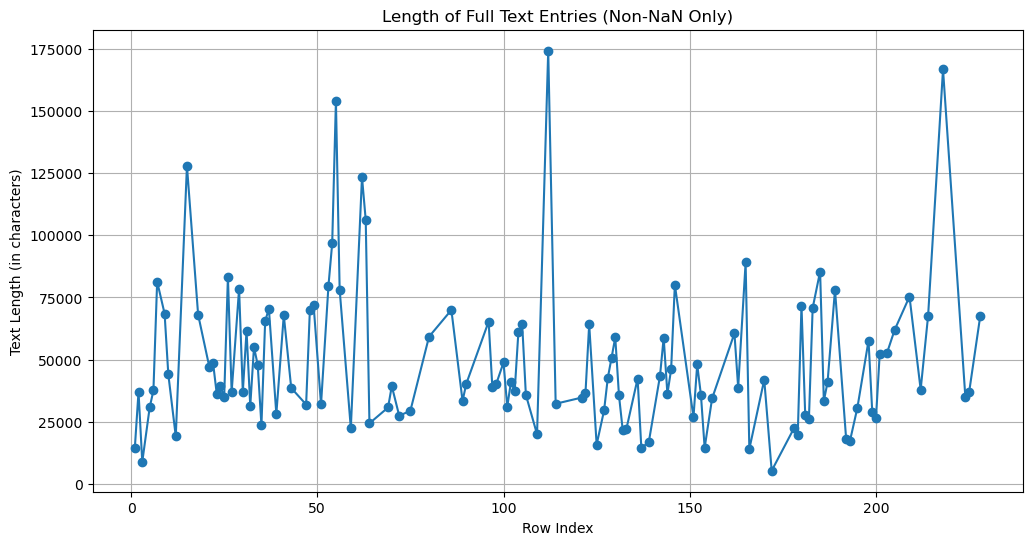

In [33]:
df_no_nan = df.dropna(subset=['Full_Text'])
df_no_nan['Text_Length'] = df_no_nan['Full_Text'].apply(len)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_no_nan.index, df_no_nan['Text_Length'], marker='o', linestyle='-')
plt.title('Length of Full Text Entries (Non-NaN Only)')
plt.xlabel('Row Index')
plt.ylabel('Text Length (in characters)')
plt.grid(True)
plt.show()

In [34]:
# Filter rows in df_no_nan where the length of 'Full_Text' is zero
empty_text_rows = df_no_nan[df_no_nan['Text_Length'] <= 10000]

# Display the filtered rows
empty_text_rows

,Unnamed: 0,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text,Text_Length
3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...,8779
172,172,Machine learning models that remember too much,"['C Song', 'T Ristenpart', 'V Shmatikov']",2017,622,Toronto Face Database,machine learning,a machine learning pipeline consists of severa...,Proceedings of the 2017 ACM …,https://arxiv.org/abs/1709.07886,Machine Learning Models that Remember Too Much...,5282
